In [29]:
import pandas as pd
import numpy as np
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn import svm
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [45]:
customers = pd.read_excel('Dataset.xlsx',
sheetname=0,
header=0,
index_col=False,
keep_default_na=True
)

/anaconda3/lib/python3.6/site-packages/pandas/io/excel.py:329: FutureWarning: The `sheetname` keyword is deprecated, use `sheet_name` instead
  **kwds)


In [4]:
customers.columns

Index(['Month', 'WeekOfMonth', 'DayOfWeek', 'Make', 'AccidentArea',
       'DayOfWeekClaimed', 'MonthClaimed', 'WeekOfMonthClaimed', 'Sex',
       'MaritalStatus', 'Age', 'Fault', 'PolicyType', 'VehicleCategory',
       'VehiclePrice', 'FraudFound_P', 'PolicyNumber', 'RepNumber',
       'Deductible', 'DriverRating', 'Days_Policy_Accident',
       'Days_Policy_Claim', 'PastNumberOfClaims', 'AgeOfVehicle',
       'AgeOfPolicyHolder', 'PoliceReportFiled', 'WitnessPresent', 'AgentType',
       'NumberOfSuppliments', 'AddressChange_Claim', 'NumberOfCars', 'Year',
       'BasePolicy', 'ClaimSize'],
      dtype='object')

In [46]:
def married(status):
    if status=='Married':
        return 1
    else:
        return 0
def single(status):
    if status=='Single':
        return 1
    else:
        return 0
def divorced(status):
    if status=='Divorced':
        return 1
    else:
        return 0
def widow(status):
    if status=='Widow':
        return 1
    else:
        return 0
customers['Married']=customers['MaritalStatus'].apply(married)
customers['Single']=customers['MaritalStatus'].apply(single)
customers['Divorced']=customers['MaritalStatus'].apply(divorced)
customers['Widow']=customers['MaritalStatus'].apply(widow)
del customers['MaritalStatus']

In [47]:
def collision(base):
    if base=='Collision':
        return 1
    else:
        return 0
def liability(base):
    if base=='Liability':
        return 1
    else:
        return 0
def perils(base):
    if base=='All Perils':
        return 1
    else:
        return 0    
customers['Collision']=customers['BasePolicy'].apply(collision)
customers['Liability']=customers['BasePolicy'].apply(liability)
customers['All Perils']=customers['BasePolicy'].apply(perils)
del customers['BasePolicy']

In [48]:
def convertStr(boolean):
    if boolean=='No':
        return 0
    elif boolean=='Yes':
        return 1
customers['PoliceReportFiled']=customers['PoliceReportFiled'].apply(convertStr)  
customers['WitnessPresent']=customers['WitnessPresent'].apply(convertStr) 

In [49]:
def convertAgent(agent):
    if agent=='External':
        return 1
    elif agent=='Internal':
        return 2
customers['AgentType']=customers['AgentType'].apply(convertAgent) 

In [50]:
def convertCar(car):
    if car=='1 vehicle':
        return 1
    elif car=='2 vehicles':
        return 2
    elif car=='3 to 4':
        return 3
    elif car=='5 to 8':
        return 4
    elif car=='more than 8':
        return 5
customers['NumberOfCars']=customers['NumberOfCars'].apply(convertCar) 

In [51]:
def convertAddressChange(address):
    if address=='no change':
        return 0
    elif address=='under 6 months':
        return 1
    elif address=='1 year':
        return 2
    elif address=='2 to 3 years':
        return 3
    elif address=='4 to 8 years':
        return 4
customers['AddressChange_Claim']=customers['AddressChange_Claim'].apply(convertAddressChange)   

In [52]:
def convertSuppliments(suppliment):
    if suppliment=='none':
        return 0
    elif suppliment=='1 to 2':
        return 1
    elif suppliment=='3 to 5':
        return 2
    elif suppliment=='more than 5':
        return 3
customers['NumberOfSuppliments']=customers['NumberOfSuppliments'].apply(convertSuppliments)     

In [53]:
def convertClaims(claim):
    if claim=='none':
        return 0
    elif claim==1:
        return 1
    elif claim=='2 to 4':
        return 2
    elif claim=='more than 4':
        return 3
customers['PastNumberOfClaims']=customers['PastNumberOfClaims'].apply(convertClaims)      

In [54]:
def convertDaysPolicy(number):
    if number=='none':
        return 0
    elif number=='1 to 7':
        return 1
    elif number=='8 to 15':
        return 2
    elif number=='15 to 30':
        return 3
    elif number=='more than 30':
        return 4
customers['Days_Policy_Accident']=customers['Days_Policy_Accident'].apply(convertDaysPolicy)   
customers['Days_Policy_Claim']=customers['Days_Policy_Claim'].apply(convertDaysPolicy) 

In [55]:
def convertFault(fault):
    if fault=='Policy Holder':
        return 0
    elif fault=='Third Party':
        return 1
customers['Fault']=customers['Fault'].apply(convertFault)  

In [56]:
customers.dropna(inplace=True)
customers.drop(customers.index[[1146]],inplace=True)
X=customers[customers['DriverRating'].isnull()].index
customers.drop(customers.index[[X]],inplace=True)
X=customers[customers['Age'].isnull()].index
customers.drop(customers.index[[X]],inplace=True)

In [57]:
def sport(category):
    if category=='Sport':
        return 1
    else:
        return 0
def sedan(category):
    if category=='Sedan':
        return 1
    else:
        return 0
def utility(category):
    if category=='Utility':
        return 1
    else:
        return 0
customers['Sport']=customers['VehicleCategory'].apply(sport)
customers['Sedan']=customers['VehicleCategory'].apply(sedan)
customers['Utility']=customers['VehicleCategory'].apply(utility)
del customers['VehicleCategory']  

In [58]:
def convertAgeHolder(age):
    if age=='16 to 17':
        return 1
    elif age=='18 to 20':
        return 2
    elif age=='21 to 25':
        return 3
    elif age=='26 to 30':
        return 4
    elif age=='31 to 35':
        return 5
    elif age=='36 to 40':
        return 6
    elif age=='41 to 50':
        return 7
    elif age=='51 to 65':
        return 8
    elif age=='over 65':
        return 9
customers['AgeOfPolicyHolder']=customers['AgeOfPolicyHolder'].apply(convertAgeHolder)  

In [59]:
def convertAgeVehicle(age):
    if age=='new':
        return 1
    elif age=='2 years':
        return 2
    elif age=='3 years':
        return 3
    elif age=='4 years':
        return 4
    elif age=='5 years':
        return 5
    elif age=='6 years':
        return 6
    elif age=='7 years':
        return 7
    elif age=='more than 7':
        return 8
customers['AgeOfVehicle']=customers['AgeOfVehicle'].apply(convertAgeVehicle)  

In [60]:
def convertPrice(price):
    if price=='less than 20000':
        return 0
    elif price=='20000 to 29000':
        return 1
    elif price=='30000 to 39000':
        return 2
    elif price=='40000 to 59000':
        return 3
    elif price=='60000 to 69000':
        return 4
    elif price=='more than 69000':
        return 5
customers['VehiclePrice']=customers['VehiclePrice'].apply(convertPrice)  

In [61]:
def convertMonth(month):
    if month=='Jan':
        return 1
    elif month=='Feb':
        return 2
    elif month=='Mar':
        return 3
    elif month=='Apr':
        return 4
    elif month=='May':
        return 5
    elif month=='Jun':
        return 6
    elif month=='Jul':
        return 7
    elif month=='Aug':
        return 8
    elif month=='Sep':
        return 9
    elif month=='Oct':
        return 10
    elif month=='Nov':
        return 11
    elif month=='Dec':
        return 12
customers['Month']=customers['Month'].apply(convertMonth)
customers['MonthClaimed']=customers['MonthClaimed'].apply(convertMonth)  

In [62]:
def convertDay(day):
    if day=='Monday':
        return 1
    elif day=='Tuesday':
        return 2
    elif day=='Wednesday':
        return 3
    elif day=='Thursday':
        return 4
    elif day=='Friday':
        return 5
    elif day=='Saturday':
        return 6
    elif day=='Sunday':
        return 7
customers['DayOfWeek']=customers['DayOfWeek'].apply(convertDay)
customers['DayOfWeekClaimed']=customers['DayOfWeekClaimed'].apply(convertDay)   

In [63]:
def convertSex(sex):
    if sex=='Male':
        return 0
    elif sex=='Female':
        return 1
customers['Sex']=customers['Sex'].apply(convertSex)  

In [64]:
def convertArea(area):
    if area=='Urban':
        return 0
    elif area=='Rural':
        return 1
customers['AccidentArea']=customers['AccidentArea'].apply(convertArea)   

In [65]:
def createMake(carMake):
    if carMake=='Jaguar' or carMake=='Lexus' or carMake=='Mecedes' or carMake=='BMW' or carMake=='Porche' or carMake=='Ferrari':
        return 1
    else:
        return 0
customers['Make']=customers['Make'].apply(createMake)

In [66]:
##del customers['PolicyNumber']
del customers['Year']

del customers['PolicyType']

In [67]:
def display_all(df):
    with pd.option_context("display.max_rows", 1000): 
        with pd.option_context("display.max_columns", 50): 
            display(df)

In [68]:
display_all(customers.head())

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,Age,Fault,VehiclePrice,FraudFound_P,PolicyNumber,RepNumber,Deductible,DriverRating,Days_Policy_Accident,Days_Policy_Claim,PastNumberOfClaims,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,ClaimSize,Married,Single,Divorced,Widow,Collision,Liability,All Perils,Sport,Sedan,Utility
0,12,5,3,0,0,2.0,1.0,1,1,21.0,0,5,0,1,12,300,1.0,4,4,0,3,4,0,0,1,0,2,3,55526.069421,0,1,0,0,0,1,0,1,0,0
1,1,3,3,0,0,1.0,1.0,4,0,34.0,0,5,0,2,15,400,4.0,4,4,0,6,5,1,0,1,0,0,1,59294.455571,0,1,0,0,1,0,0,1,0,0
2,10,5,5,0,0,4.0,11.0,2,0,47.0,0,5,0,3,7,400,3.0,4,4,1,7,7,0,0,1,0,0,1,71756.941320,1,0,0,0,1,0,0,1,0,0
3,6,2,6,0,1,5.0,7.0,1,0,65.0,1,1,0,4,4,400,2.0,4,4,1,8,8,1,0,1,3,0,1,7584.153493,1,0,0,0,0,1,0,1,0,0
4,2,1,6,0,0,1.0,2.0,3,0,36.0,1,5,0,7,14,400,1.0,4,4,1,7,6,0,0,1,1,0,1,98545.374339,1,0,0,0,1,0,0,1,0,0


In [44]:
customers['']

Index(['Month', 'WeekOfMonth', 'DayOfWeek', 'AccidentArea', 'DayOfWeekClaimed',
       'MonthClaimed', 'WeekOfMonthClaimed', 'Sex', 'Age', 'Fault',
       'VehiclePrice', 'FraudFound_P', 'PolicyNumber', 'RepNumber',
       'Deductible', 'DriverRating', 'Days_Policy_Accident',
       'Days_Policy_Claim', 'PastNumberOfClaims', 'AgeOfVehicle',
       'AgeOfPolicyHolder', 'PoliceReportFiled', 'WitnessPresent', 'AgentType',
       'NumberOfSuppliments', 'AddressChange_Claim', 'NumberOfCars',
       'ClaimSize', 'Married', 'Single', 'Divorced', 'Widow', 'Collision',
       'Liability', 'All Perils', 'Sport', 'Sedan', 'Utility'],
      dtype='object')

In [26]:
Fraud=customers[customers['FraudFound_P']==1]
NotFraud=customers[customers['FraudFound_P']==0]
Y_fraud=Fraud['FraudFound_P'].values
Y_NotFraud=NotFraud['FraudFound_P'].values
del Fraud['FraudFound_P']
del NotFraud["FraudFound_P"]
del customers['FraudFound_P']

In [29]:
X_train_fraud,X_test_fraud,Y_train_fraud,Y_test_fraud=train_test_split(Fraud.values,Y_fraud,test_size=0.5)
X_train_Notfraud,X_test_Notfraud,Y_train_Notfraud,Y_test_Notfraud=train_test_split(NotFraud.values,Y_NotFraud,test_size=0.80)

In [30]:
X_train=np.concatenate([X_train_fraud,X_train_Notfraud])
Y_train=np.concatenate([Y_train_fraud,Y_train_Notfraud])
X_test=np.concatenate([X_test_fraud,X_test_Notfraud])
Y_test=np.concatenate([Y_test_fraud,Y_test_Notfraud])

In [31]:
df_new=pd.DataFrame(X_train)
df_new.columns=customers.columns
df_new['FraudFound_P']=Y_train
df_new = df_new.sample(frac=1).reset_index(drop=True)
Y_train=df_new['FraudFound_P'].values
del df_new['FraudFound_P']
X_train=df_new.values

In [ ]:
### Use Your Algo
### Analysing the Public Holiday in Australia
## 1 January,26 January,2nd Monday in February,1st Monday in March,2nd Monday in March
## 25 April,1st Monday in May,1st Monday after or on 27 May,1st Monday in June,2nd Monday in June
## 1st Monday in October,25 December,26 December,31 December


In [93]:
## Analysing the 1 January
claimed=customers[(customers['MonthClaimed']==1.0) & (customers['WeekOfMonthClaimed']==1)]
TotalClaim=claimed.shape[0]
FraudClaimed=claimed[claimed['FraudFound_P']==1].shape[0]
NotFraudClaimed=claimed[claimed['FraudFound_P']==0].shape[0]
accident=customers[(customers['Month']==1.0) & (customers['WeekOfMonth']==1)]
TotalAccident=accident.shape[0]
FraudAccident=accident[accident['FraudFound_P']==1].shape[0]
NotFraudAccident=accident[accident['FraudFound_P']==0].shape[0]
print(TotalClaim,FraudClaimed,NotFraudClaimed)
print(TotalAccident,FraudAccident,NotFraudAccident)

215 15 200
220 10 210


In [91]:
## Analysing the 26 January
claimed=customers[(customers['MonthClaimed']==1.0) & (customers['WeekOfMonthClaimed']==4)]
TotalClaim=claimed.shape[0]
FraudClaimed=claimed[claimed['FraudFound_P']==1].shape[0]
NotFraudClaimed=claimed[claimed['FraudFound_P']==0].shape[0]
accident=customers[(customers['Month']==1.0) & (customers['WeekOfMonth']==5)]
TotalAccident=accident.shape[0]
FraudAccident=accident[accident['FraudFound_P']==1].shape[0]
NotFraudAccident=accident[accident['FraudFound_P']==0].shape[0]
print(TotalClaim,FraudClaimed,NotFraudClaimed)
print(TotalAccident,FraudAccident,NotFraudAccident)

240 14 226
129 10 119


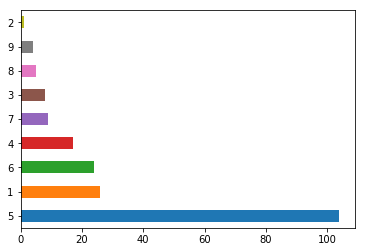

In [41]:
customers['AgeOfPolicyHolder'][(customers['FraudFound_P'] == 1) & (customers['Single']==1)].value_counts().plot('barh')
## 31 to 35 Year

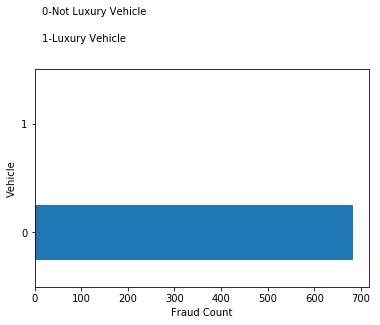

In [86]:
customers['Make'][customers['FraudFound_P']==1].value_counts().plot('barh')
plt.xlabel('Fraud Count')
plt.ylabel('Vehicle')
plt.text(15,2,'0-Not Luxury Vehicle')
plt.text(15,1.75,'1-Luxury Vehicle')
plt.savefig('make.png')

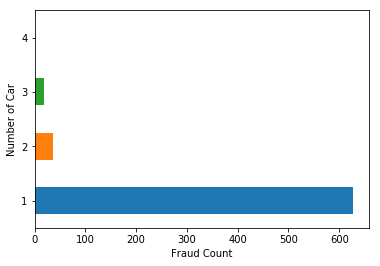

In [40]:
customers['NumberOfCars'][(customers['FraudFound_P']==1)].value_counts().plot('barh')
plt.xlabel('Fraud Count')
plt.ylabel('Number of Car')
plt.savefig('car.png')

##if 1 vehicle':'2 vehicles':3 to 4':5 to 8':

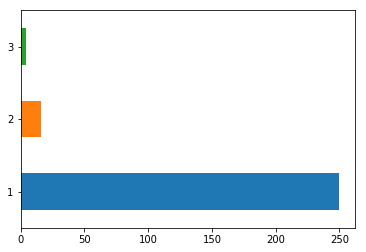

In [101]:
customers['NumberOfCars'][(customers['FraudFound_P']==1) & (customers['AgeOfPolicyHolder']==5)].value_counts().plot('barh')

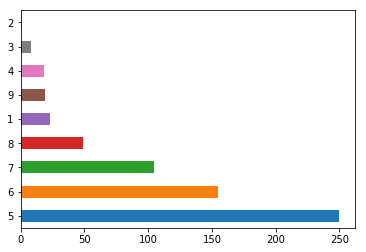

In [103]:
customers['AgeOfPolicyHolder'][(customers['FraudFound_P']==1) & (customers['NumberOfCars']==1)].value_counts().plot('barh')

In [105]:
customers['AgeOfPolicyHolder'][(customers['FraudFound_P'] == 1)].value_counts().sum()

685

In [104]:
customers['AgeOfPolicyHolder'][(customers['FraudFound_P']==1) & (customers['NumberOfCars']==1)].value_counts().sum()

628

In [73]:
customers['WeekOfMonth'].value_counts()

3    2749
2    2678
4    2524
1    2386
5    1216
Name: WeekOfMonth, dtype: int64

In [64]:
X=customers[(customers['MonthClaimed']==1.0) & (claimed['DayOfWeekClaimed']==1.0) & (customers['Month']==1.0) & customers['DayOfWeek']==1.0 ]

In [78]:
TotalAccident=X.shape[0]
FraudAccident=X[X['FraudFound_P']==1].shape[0]
NotFraudAccident=X[X['FraudFound_P']==0].shape[0]
print(TotalAccident,FraudAccident,NotFraudAccident)

163 9 154


In [79]:
print(TotalClaim,FraudClaimed,NotFraudClaimed)
print(TotalAccident,FraudAccident,NotFraudAccident)

0 0 0
163 9 154


In [59]:
claimed=customers[customers['MonthClaimed']==1.0]
claimed=claimed[(claimed['DayOfWeekClaimed']==1.0)]

(553, 38)

In [102]:
b=[[1,0,0,0,0,1,0],[1,1,1,1,0]]
element,count=np.unique(b,return_counts=True)

In [104]:
for i in b:
    counts = np.bincount(i)
    print (np.argmax(counts))

0
1


In [101]:
counts

array([4, 2, 1, 0, 0, 0, 0, 0, 0, 0, 1])